<center> <h1> COVID-19  Impact on Digital Learning <h1><center> 

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h2>Table of Content</h2>

* [Introduction](#1)
* [Problem Statement](#2)
* [The study Objective](#3)
* [The Methodology](#4)
    
* [Exploratory Data Analysis](#5)  
* [Univariate and Multivariate Analysis](#6)
* [Combining Data](#7)
* [Summary key findings](#8)

<a id="1"></a>
<h2>Introduction</h2>

 Digital learning is any type of learning that is accompanied by technology or by instructional practice that makes effective use of technology. It encompasses the application of a wide spectrum of practices, including blended and virtual learning [[1]](https://en.wikipedia.org/wiki/Digital_learning).
     
  On March 11, 2020, the World Health organization declared COVID-19 a global pandemic. Following the speed with which COVID-19 spread to all parts of the world, and to contain the spread of the disease, most governments around the world[[2]](https://www.frontiersin.org/articles/10.3389/fpubh.2020.576227/full). According to [[3]](https://en.unesco.org/covid19/educationresponse),Over 1.2 billion children are out of the classroom. As a result, education has changed dramatically, with the distinctive rise of digital learnung and e-learning, whereby teaching is undertaken remotely and on digital platforms.
  
  
  
  
 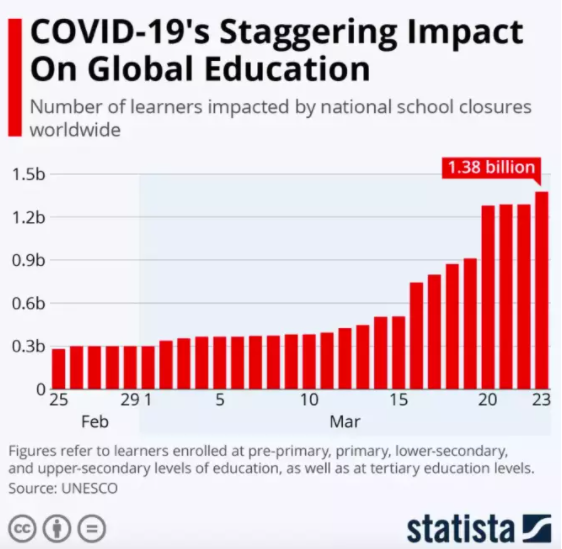

<a id="2"></a>
<h2>Problem Statement</h2>




<p> The  Pandemic has disrupted learning for more than 56 million students in the United States. In the Spring of 2020, most states and local governments across the U.S. closed educational institutions to stop the spread of the virus. 
<p>In response, schools and teachers have attempted to reach students remotely through distance learning tools and digital platforms. Until today, concerns of the exacaberting digital divide and long-term learning loss among America’s most vulnerable learners continue to grow. <p

<a id="3"></a>
<h2> The Study Objective</h2>



This study Consists of exploring the data in order to answer the two main questions of this competition : 
* The state of digital learning in 2020.  
* How the engagement of digital learning relates to factors such as district demographics, broadband access, and state/national level policies and events.

<a id="4"></a>
<h2> The Methodology</h2>

This research is based on descriptive methodology which uses secondary data and findings. First we provide an overview about the data  and conduct exploratory analysis ( univariant and bivariant analysis ) to extracts usefull insights , second we combine data provided by the LearnerPlatform company which is a a set of daily edtech engagement from over 200 school districts in 2020 in order to ansew the problems quetions, finaly we conclude with a brief summary and potential recommandations to the problems and future work.

## Data Overview 
the data consists of three basic sets of files :
* **The engagement_data_folder** is based on LearnPlatform’s Student Chrome Extension. The extension collects page load events of over 10K education technology products in our product library, including websites, apps, web apps, software programs, extensions, ebooks, hardwares, and services used in educational institutions. The engagement data have been aggregated at school district level, and each file represents data from one school district.
* **The products_info.csv** file includes information about the characteristics of the top 372 products with most users in 2020.
* **The districts_info.csv** file includes information about the characteristics of school districts, including data from NCES and FCC.


### Set up the Notebook 
In order to be able to explore this data we are going to setup the notebook , we import some common libraries used in data analysis including: 
* Pandas : to handle and work with dataframe 
* numpy  : for mathematical  operations 
* matplotlib : for creating static, animated, and interactive visualizations
* seaborn : to provide a high-level interface for drawing attractive and informative statistical graphics.
* other packages : we will also import other packages to help us organize and manupilate the data.

In [ ]:
## install packages 
import os , glob ,re 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt # visualizations 
import seaborn as sns 
import plotly
import plotly.express as px
sns.set(style="white")
%matplotlib inline
# time series analysis
print("Setup Complete")

### Load the data


Now we can load the data and start working with it.

In [ ]:
## engagment data 
path = '../input/learnplatform-covid19-impact-on-digital-learning/engagement_data' 
files = glob.glob(path + "/*.csv")

all_files = []

for filename in files:
    df = pd.read_csv(filename, index_col=None, header=0)
    district_id = filename.split("/")[4].split(".")[0]
    df["district_id"] = district_id
    all_files.append(df)
    
engagement_data = pd.concat(all_files)
engagement_data = engagement_data.reset_index(drop=True)

##Product information data
product_info = pd.read_csv("../input/learnplatform-covid19-impact-on-digital-learning/products_info.csv")
## districts information data 
districts_info = pd.read_csv("../input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv")
state_policy = pd.read_csv("../input/covid19-us-state-policy-database/data.csv")
 
print("Yor data is set to be used..")



# <a id="5"></a>
<h2 > Exploratory Data Analysis</h2>

We will  analyze and investigate the datasets and summarize their main characteristics so we can see what data can reveal.

#### Product Information Data


In [ ]:
# quick look at the product information data 
product_info.head(5).style.set_properties(**{'background-color': 'white',
                           'color': 'blue',
                           'border-color': 'white'})  # first five rows 


In [ ]:
print(" the products_info columns are..")
product_info.shape,  #'372,6'
product_info.columns # list of columns in the data

In [ ]:
print(f'Number of rows: {product_info.shape[0]};  Number of columns: {product_info.shape[1]}; No of missing values: {sum(product_info.isna().sum())}')

In [ ]:
# looking for missing values 
plt.figure(figsize=(10,6))
plt.title("Missing products Info values", {'fontsize': 15})
sns.barplot(data = product_info.isna().sum().reset_index(), y = 'index', palette="Blues_d", x=0)

There are 372 rows and 6 columns in this data and we have 41 missed values .


In [ ]:
print("information about the products data ")
product_info.info()

The product table hase 5 columns with object type and only the LPID is an integer. 

In [ ]:
# check for duplicated values 
product_info.duplicated().any()

The products_info table has no duplicated values.

#### Districts Information table

In [ ]:
# quick look at the districts data 
districts_info.head(5).style.set_properties(**{'background-color': 'white',
                           'color': 'blue',
                           'border-color': 'white'})  # first five rows  #frist 3 rows 


In [ ]:
print("Districts table columns are : ")
districts_info.shape  #'233,7'
districts_info.columns # list of columns in the data

In [ ]:
print(f'Number of rows: {districts_info.shape[0]};  Number of columns: {districts_info.shape[1]}; No of missing values: {sum(districts_info.isna().sum())}')

In [ ]:
# looking for missing values 
plt.figure(figsize=(10,6))
plt.title("Missing districts Info values", {'fontsize': 15})
sns.barplot(data = districts_info.isna().sum().reset_index(), y = 'index', palette="Blues_d", x=0)

There are 233 rows and 7 columns in this data and we have 442 ( quite a lot ) missed values , let's where are they sattled.


In [ ]:
print(" General info about Districts table ") 
districts_info.info()


In [ ]:
#check for duplicated 
districts_info.duplicated().any()

Districts Data has no duplicated values.

#### Engagement data

In [ ]:
engagement_data.head(5).style.set_properties(**{'background-color': 'white',
                           'color': 'blue',
                           'border-color': 'white'}) # head of the data  


In [ ]:
print('Engagement data columns are :')
engagement_data.shape  # data shape of '22324190,5'
engagement_data.columns # list of columns in the data

In [ ]:
print(f'Number of rows: {engagement_data.shape[0]};  Number of columns: {engagement_data.shape[1]}; No of missing values: {sum(engagement_data.isna().sum())}')

There are 22324190 rows and 5 columns in this data and we have 5392397  missed values,

In [ ]:
print("General  info about engagement data ") 
engagement_data.info()

In [ ]:
# check for duplicated values 
engagement_data.duplicated().any()
print('Engagement_data has no duplicated values.')

<a id="6"></a>
<h2>Univariate  and Multivariate Analysis</h2>
Now we  start looking deep into our data in order to get helpful insights. 

#### Product Information Data
We first do some preprocessing to clean the headers and contents.[[4]](https://www.kaggle.com/iamleonie/how-to-approach-analytics-challenges#How-To-Approach-Analytics-Challenges) 

***One-Hot Encoding the Product Sectors***

In [ ]:
# One-Hot Encoding the Product Sectors
temp_sectors = product_info['Sector(s)'].str.get_dummies(sep="; ")
temp_sectors.columns = [f"sector_{re.sub(' ', '', c)}" for c in temp_sectors.columns]
product_info = product_info.join(temp_sectors)
product_info.drop("Sector(s)", axis=1, inplace=True)

del temp_sectors

print("Onhot encoding for product sectors done.")

***Splitting up the Primary Essential Function***

In [ ]:
#Splitting up the Primary Essential Function
product_info['primary_function_main'] = product_info['Primary Essential Function'].apply(lambda x: x.split(' - ')[0] if x == x else x)
product_info['primary_function_sub'] = product_info['Primary Essential Function'].apply(lambda x: x.split(' - ')[1] if x == x else x)

# Synchronize similar values
product_info['primary_function_sub'] = product_info['primary_function_sub'].replace({'Sites, Resources & References' : 'Sites, Resources & Reference'})
product_info.drop("Primary Essential Function", axis=1, inplace=True)

In [ ]:
print("Our new product data looks like this ")
product_info.head().style.set_properties(**{'background-color': 'white',
                           'color': 'blue',
                           'border-color': 'white'})

***Total of products per Company Name ( TOP 10)***

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(y='Provider/Company Name', data=product_info, order=product_info["Provider/Company Name"].value_counts().index[:10],palette = "flare_r")
plt.title("Total of products per Company Name ( TOP 10)", size=20)
plt.show()

Google LLC is the leader provider for digital learning productS by almost 30 products , Microsoft and Houghton Mifflin Harcourt come in second and third place .


***What are top Essential function of diffrent products?***

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'primary_function_sub', order=product_info["primary_function_sub"].value_counts().index[:5],
            data=product_info,color="blue")
plt.title(" Top 5 Product's primary_function_sub", size=20)


#### Districts Information Data

***What are most represented states /locales in our data?***.

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'state', order=districts_info["state"].value_counts().index[:10],
            data=districts_info,color="#9933CC")
plt.title("count of state districts ")

There are a total of 23 states presented across the united states (46% of all states), While  Connecticut, Utah and Massachusetts,illinois are the most represented states on our data with 30,29 ,21 and 18 districts respectively. these cities are devided into four categories namely ,Suburb( 104 districts ) Rural (33) , City (29) and Town(10). 

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y = 'locale', order=districts_info["locale"].value_counts().index[:5],
            data=districts_info,color="#5533AA")
plt.title(" Total of districts by locale", {'fontsize':20})

***What's the Total Count of Districts by pct_black/hispanic and pct_free/reduced***

In [ ]:
fig, axs = plt.subplots(ncols=2,figsize=(15, 6))
sns.countplot(x = 'pct_black/hispanic', order=districts_info["pct_black/hispanic"].value_counts().index[:5],
            data=districts_info,color="#CC6666",ax=axs[0])
axs[0].set_title("Count of Districts by pct_black/hispanic",fontsize=18)
#plt.figure(figsize=(11,6))
sns.countplot(x = 'pct_free/reduced', order=districts_info["pct_free/reduced"].value_counts().index[:5],
            data=districts_info,color="#CC6666",ax=axs[1])
axs[1].set_title("Count of districts by pct_free/reduced",fontsize=18)
plt.tight_layout()
plt.show()

Looking at the figure above , we can see that districts with pct_black/hispanic around [0,0.2] are the most presented with 116 districts, in the other hand we have 131 districts with a pct_free/reduced ranging from[0,0.6[

***What's the Count of districts by Socio-Economic Status?***.

In [ ]:
fig, axs = plt.subplots(ncols=2,figsize=(15, 5))
sns.countplot(x = 'county_connections_ratio', order=districts_info["county_connections_ratio"].value_counts().index[:5],
            data=districts_info,color="#533335",ax=axs[0])
axs[0].set_title("Count of Districts by County_connections_ratio",fontsize=18)
#plt.figure(figsize=(11,6))
sns.countplot(x = 'pp_total_raw', order=districts_info["pp_total_raw"].value_counts().index[:5],
            data=districts_info,color="#533335",ax=axs[1])
axs[1].set_title("Count of Districts by pp_total_raw",fontsize=18)
plt.tight_layout()
plt.show()

When we look at the charts above we can detect that Districts where the county_connections_ratio is with in [0.18 , 1[ are the most presented with 158  districts , but we can't rely on this because we have 71 missings data points on this column, in the other hand , the count of districts by Per Pupil Total Expenditure shows a Reverse relationship ( the less the pp_total_raw is the more disctricts we have ) we also should not forget that we have 115 missings values with in this column.

### Engagement data table
<p> now we take a look at our engagement data table , we will first preprocess the time column and add some features that might help us regroup our data better. 

In [ ]:
#time preprocessing 
engagement_data["time"]=pd.to_datetime(engagement_data['time'],format='%Y-%m-%d')
engagement_data['quarter']=engagement_data['time'].dt.quarter
engagement_data['month']=engagement_data['time'].dt.month_name() 
engagement_data['dayofweek_name']=engagement_data['time'].dt.day_name()


Now our engagement data look like as bellow .

In [ ]:
engagement_data.head(5).style.set_properties(**{'background-color': 'white',
                           'color': 'blue',
                           'border-color': 'white'}) 

#### How both pct_access and engagement index changed over time ( month and day) ?
We want to understand how COVID-19 pandemic impacted online and distance learning, and how might this also evolve in the future.

In [ ]:
#pct_access
plt.style.use("fivethirtyeight")
tp=engagement_data.groupby(["time"])["pct_access"].sum()
plt.figure(figsize=(14,10))
plt.subplot(211)
plt.title('Total pct_access by time ')
plt.xlabel('Time')
plt.ylabel('pct_access')
plt.plot(tp,color='#386B7F');
#engagement_index
te=engagement_data.groupby(["time"])["engagement_index"].sum()
plt.subplot(212)
plt.title('Engagement by time')
plt.xlabel('Time')
plt.ylabel('engagement_index')
plt.plot(te,color= '#386B7F');

We can see Pct_acess ,engagement_index droped around the middle of the year.

***Total pct_access and total engagement_index by month***

In [ ]:
#pct_accecsS
plt.figure(figsize=(14,10))
tm=engagement_data.groupby(["month"])["engagement_index"].sum().reset_index().set_index('month')
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df1= tm.reindex(new_order, axis=0)
plt.subplot(211)
plt.title('Total pct_access by moth')
plt.xlabel('month')
plt.ylabel('Pct_access')
plt.plot(df1,color= '#386B7F');
#engagement_index
tmi=engagement_data.groupby(["month"])["engagement_index"].sum().reset_index().set_index('month')
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df2= tmi.reindex(new_order, axis=0)
plt.subplot(212)
plt.title('total engagement_index by month')
plt.xlabel('Time')
plt.ylabel('engagement_index')
plt.plot(df2,color= '#386B7F');

Now we can see clearly that both pct_access,engagement index reached the mean around july [summer vacation.].

***Total pct_access and total engagement_index by weekdays***.

In [ ]:
#datapreparation 
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
df1 = engagement_data.groupby(["dayofweek_name"])["pct_access"].sum().reset_index().set_index('dayofweek_name')
df1['Day_id'] = df1.index
df1['Day_id'] = df1['Day_id'].map(sorterIndex)
df1.sort_values('Day_id', inplace=True)
## 
df=engagement_data.groupby(["dayofweek_name"])["engagement_index"].sum().reset_index().set_index('dayofweek_name')
df['Day_id'] = df.index
df['Day_id'] = df['Day_id'].map(sorterIndex)
df.sort_values('Day_id', inplace=True)
#pct_access
plt.figure(figsize=(14,10))
plt.subplot(211)
plt.title('Total pct_access by day')
plt.xlabel('day')
plt.ylabel('Pct_access')
plt.plot(df1,color= '#386B7F');
#engagement_index
plt.subplot(212)
plt.title('Total engagement_index by day')
plt.xlabel('day')
plt.ylabel('engagement_index')
plt.plot(df,color= '#386B7F');

As we expected Pct_access, Engagement_index dropped on saturday and sunday (Weekend),While the high values where on thursday , tuesday and wednesday.

As a summary , we can conclud that engagment and pct access kept increasing starting quite low on january and reached the pick around october 2020 . while having the lowest values on weekends and holidays. We assume Technological transformations will continue.However as districts reopeneing their doors, digital and distance learning ( virtual teaching ) will be less adopted and we expect that engagement will be quite low in the near future regarding how it was on 2020.


<a id="7"></a>
<h2> Combining Data </h2>
Now and in order to get the most of our data we are going to combine them.

***Product data and engagement data Merging.***

In [ ]:
#product_engagement 
product_engagement_df = pd.merge(product_info, engagement_data, left_on='LP ID', right_on='lp_id')
product_engagement_df.set_index("time")
product_engagement_df.head().style.set_properties(**{'background-color': 'white',
                           'color': 'blue',
                           'border-color': 'white'})

***Producing features correlation for our combined data***.

In [ ]:
# producing features correlation 
plt.style.use('seaborn-white')
plt.figure(figsize=(10,8))
corr_matrix = product_engagement_df.corr(method ='pearson')
sns.heatmap(corr_matrix, cmap="YlOrBr", annot=True)

There are no clear correlation between variables except for pct_access and engagement_index ( which quite expected ) , sector_corprate feature is somehow correlated to both engagement index and pct_access. 

**How both Engagement and Pct_access differs with in Primary_Function**
<p>
Below we can see that products which has , learning management systems , school managment software , virtual classroom , online course providers and content creation as primary function were top 5 most accessed products (sorted by the mean)  that gained the most engagement over the pandemic in 2020.we may need to look deep in eatch category to better understand what products ( by name ) dominated overall engagement.

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(22,8 ))
data =  product_engagement_df.groupby('primary_function_sub').mean().reset_index()
plt.title("Mean of Engagement By primary sub_function ", {'fontsize':20})
sns.barplot(data =data,y = 'primary_function_sub',x = 'engagement_index' , palette ="ch:s=.25,rot=-.25",order=data.sort_values('engagement_index',ascending=False).primary_function_sub)
plt.show()

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(22,8))
plt.title("Mean of Pct_acess By primary sub_function ", {'fontsize':20})
sns.barplot(data =data,y = 'primary_function_sub',x = 'pct_access' , palette ="ch:s=.25,rot=-.25", order=data.sort_values('pct_access',ascending=False).primary_function_sub)
plt.show()

***What are most accessed products during 2020 ?***

In [ ]:
plt.figure(figsize=(14, 10))
sns.countplot(y='Product Name', data=product_engagement_df, order=product_engagement_df["Product Name"].value_counts().index[:20],palette = "bone")
plt.title("Most accessed product (TOP 15)", size=20)
plt.show()

Here we can clearly see that google products are dominating , with google docs , google drive and google sheets being the most used products during the pandemic , we can spot Netflix setting out there under "Sites, Resources & Reference" as primary_function ( Can we learn by watching films and Tv show ?). We need to be carefull with the products list.looking to the below left figure we can see which products received more engagement in 2020 (sorted by mean),the list doesn't differ that much from the chart above with some products entering the list of top 20 including but not limited to youtube, canvas and Aleks.



In [ ]:
plot1= product_engagement_df.groupby('Product Name').mean().reset_index().sort_values('engagement_index',ascending=False).iloc[:15,:]
f, ax = plt.subplots(ncols=2, figsize=(25, 10))
sns.barplot(data = plot1,  y='Product Name',x = 'engagement_index',palette ='YlGnBu_r', ax=ax[0])
ax[0].set_title("Mean of daily engagement in top 15 poducts", {'fontsize':17})
plot2= product_engagement_df.groupby('Product Name').sum().reset_index().sort_values('pct_access',ascending=False).iloc[:15,:]
sns.barplot(data =plot2, y = 'Product Name',x = 'pct_access', palette = 'YlGnBu_r',ax=ax[1])
ax[1].set_title("mean of daiy pct_acess in top 15 products", {'fontsize':17})
plt.show()


***Merging of districts data and engagement data.***

In [ ]:
#district_engagement_data
engagement_data["district_id"] = engagement_data["district_id"].astype(str).astype(int)
districts_engagement_df= pd.merge(districts_info, engagement_data, left_on='district_id', right_on='district_id')
districts_engagement_df.head().style.set_properties(**{'background-color': 'white',
                           'color': 'blue',
                           'border-color': 'white'})

**Features Correlation**.

In [ ]:
# reproducing features correlation 
plt.style.use('seaborn-white')
plt.figure(figsize=(8,6))
corr_matrix = districts_engagement_df.corr(method ='pearson')
ax = sns.heatmap(corr_matrix, cmap="Greens", annot=True)

Again we can't catch a clear correlation beatween data variables and that was quite expected. 

***How does student engagement with online learning platforms relates to different geography?***
<p> 
Looking at the figure below , Which represent the Total enggement in each state we can seestudents who are living in Connectitvcut , illinois , Massachusettes and Utah are those who most engaged during the pandemic, althoug the differences are quite small. now we want to know how that evolved during the year.


In [ ]:
plott= districts_engagement_df.groupby('state').mean().reset_index()
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(25, 9))
plt.title("Total of Engagement By State", {'fontsize':20})
sns.barplot(data = plott, y = 'state', x = 'engagement_index',palette = 'GnBu_r',order=plott.sort_values('engagement_index',ascending=False).state)
plt.show()
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(25, 9))
plt.title("Total of Pct_acess By state ", {'fontsize':20})
sns.barplot(data =plott,y = 'state',x = 'pct_access' , palette ='GnBu_r', order=plott.sort_values('pct_access',ascending=False).state)
plt.show()

**Total monthly engagement in each State**

In [ ]:
plt_eng=districts_engagement_df.groupby(['state','month'])['engagement_index'].sum().reset_index()
df33 = pd.DataFrame(plt_eng)
df33.reset_index(inplace=True)   
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
df33['time'] = pd.Categorical(df33['month'], categories=months, ordered=True)
df33 = df33.sort_values(['time','engagement_index'], ascending= [True,False])
fig = px.line(df33, x="month", y="engagement_index", title= "Total monthly engagement in each state",color="state")
fig.show()

**Total monthly pct_access in each state**

In [ ]:
plt_pct=districts_engagement_df.groupby(['state','month'])['engagement_index'].sum().reset_index()
df3 = pd.DataFrame(plt_pct)
df3.reset_index(inplace=True)   
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
df3['time'] = pd.Categorical(df3['month'], categories=months, ordered=True)
df3 = df3.sort_values(['time','engagement_index'], ascending= [True,False])
fig = px.line(df3, x="time", y="engagement_index", title= "Total monthly pct_access in each state",color="state")
fig.show()

**Total engagement by quarter in each state**

In [ ]:
sns.catplot(x="quarter", y= "engagement_index" , col="state",palette="flare" ,col_wrap=4,data=districts_engagement_df, height=2.2, aspect=2)
plt.title("engagement by quarter in each state")
plt.show()

looking at the three figures above we can see that both pct_access and engagement index is quite diffrent between states ( as captured before ) and is shown a diffrent monthly and quarter evaluations,we can see also that:
* Connecticut illinois and massachusetts mentained the lead over the year of 2020 , utah comming behind but not that far from massachussets
* North california / tennessee had a small count of pct in the second quarter ( april to juin ) wich quite strange since the schools with in these two states were totaly cosed.
* Minnesota has a quite small count of pct on the third and forth quarter
* And North Dakota  has no pct_access at all after the first quarter 


The reason behind theses remarques will revealed when we investigate state's education interventions and practicies.

#### Do certain state interventions, practices or policies (e.g., stimulus, reopening, eviction moratorium) correlate with the increase or decrease online engagement?
According to [[7]](https://ballotpedia.org/School_responses_to_the_coronavirus_(COVID-19)_pandemic_during_the_2020-2021_academic_year) 
All 50 states closed schools to in-person instruction at some point during the 2019-2020 academic year. In forty-eight states, officials closed schools to in-person instruction for the remainder of the academic year after the coronavirus outbreak. Officials in Montana and Wyoming closed schools to in-person instruction but allowed them to reopen later in the school year. The below figure from [7] llustrate School openings and closures for the 2020-2021 school year

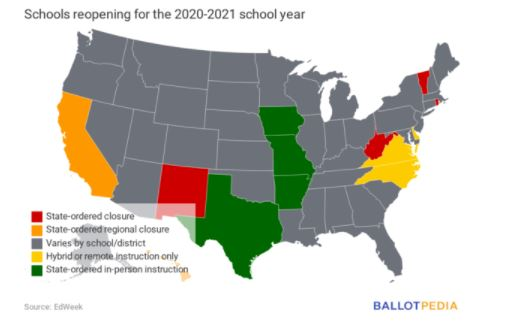

We can clearly see that different policies and interventions were taken in each states, We want to know what happend in the three most engaged states (  Connectitcut , illinois , Massachusettes ) and the three least engaged states ( North Dakota ,Minnesota, Tennessee).
#### Three most engaged states policy
Data findings comes from [7].

  **Connecticut:**
  
 Schools in Connecticut were closed to in-person instruction on March 16, 2020, and remained closed for the remainder of the 2019-2020 academic year. The state allowed schools to start reopening on August 31, 2020. The timeline below lists statewide responses :

* August 31, 2020: Connecticut schools were allowed to reopen for in-person instruction. Schools in the state were initially closed on March 16.
* July 30, 2020: Gov. Ned Lamont (D) said school districts would be able to choose between a fully in-person and hybrid plan without requiring state approval. Districts that wanted to use a fully remote model needed to apply for an exemption from the state Department of Education.
* June 25, 2020: Education Commissioner Miguel Cardona said that his department was proposing all schools reopen to students in the fall. Cardona said that students and staff would be required to wear masks while inside school buildings.
June 11, 2020: Lamont said that he expected schools in the state to reopen for classes in the fall.


 **Illinois:**
 
  Schools in Illinois were closed to in-person instruction on March 13, 2020, and remained closed for the remainder of the 2019-2020 academic year.The timeline below lists statewide responses :

* June 23, 2020: Gov. J.B. Pritzker (D) released guidance for reopening schools. The guidance required face coverings for all students and staff, prohibited gatherings of more than 50 people, and established temperature screenings and social distancing protocols.


 **Massachusetts**
 
   Schools in Massachusetts were closed to in-person instruction on March 17, 2020, and remained closed for the remainder of the 2019-2020 academic year. 

* May 17, 2021: Massachusetts started requiring schools to offer full-time in-person instruction for high schoolers on May 17.
* July 27, 2020: The Massachusetts Department of Elementary and Secondary Education signed an agreement with the state’s teachers unions to reduce the length of the 2020-2021 school year from 180 days to 170 days.
* June 24, 2020: Gov. Charlie Baker (R) released guidance for reopening schools. The guidance required all staff and students in second grade or higher to wear masks, social distancing of desks in classrooms, and students to eat breakfast and lunch in their classrooms.
* June 8, 2020: The Massachusetts Department of Elementary and Secondary Education released preliminary guidance for reopening schools. The memo outlined a face-covering requirement for both teachers and students, desks spaced six feet apart, and classroom size restrictions of 12.

#### Three least engaged states policy 
 **North Dakota**
 
  Schools in North Dakota were closed to in-person instruction on March 16, 2020, and remained closed for the remainder of the 2019-2020 academic year. The state allowed schools to start reopening on June 1, 2020. The timeline below lists statewide responses we tracked.

* May 11, 2020: Gov. Doug Burgum (R) announced that schools in North Dakota could reopen starting June 1 for summer programs, though schools were not required to. Under the order, child care programs, summer school classes, and college admissions testing could resume. The order also did not prohibit schools from offering summer distance learning options.


 **Minnesota**
 
 
 Schools in Minnesota were closed to in-person instruction on March 18, 2020, and remained closed for the remainder of the 2019-2020 academic year. 

* July 30, 2020: Gov. Tim Walz (D) released the Safe Learning Plan for reopening schools for the 2020-2021 school year. The plan required a county to have fewer than 9 coronavirus cases per 10,000 residents over a 14-day period in order to fully reopen schools. 
 
 
 **Tennessee**
  
  
  Schools in Tennessee were closed to in-person instruction on March 20, 2020, and remained closed for the remainder of the 2019-2020 academic year. 
* August 12, 2020: Tennessee Education Commissioner Penny Schwinn said that the Tennessee Department of Education was encouraging school districts to mandate face coverings for middle and high school students.
* July 28, 2020: Tennessee Gov. Bill Lee (R) released guidelines for reopening schools. The recommendations covered testing and contact tracing, immunizations, and resources necessary for returning students to classrooms or teaching remotely.
* June 8, 2020: The Tennessee Department of Education released guidance for reopening schools in August. The document did not require Tennessee school districts to adopt any particular approach but provided suggestions and best practices for safely reopening, including requiring students and staff to wear masks and setting staggered schedules.


#### Comments 
Comparinge state's education policies adopted by most three engaged states and the least three engaged states we will notice that all statesannouced that schools  were closed to in-person instruction on March 17, 2020, and remained closed for the remainder of the 2019-2020 academic year. starting from july 2020, north dakota , minnesota and tennessee Gov's start calling for school reopning ( partial and hybride learning ) , this affected directly student engagement.The more in person learnig is readopted this would directly decrease  the use of distance learning tools ( specially virtual classroom products ). In marketing compain for a digital learning product it would logically true to target students / teachers with in closed / semiclosed schools.



***How does student engagement relates to Demographic context*** 

In [ ]:
plott2 =  districts_engagement_df.groupby('pct_black/hispanic').mean().reset_index().sort_values('engagement_index',ascending=False)
f, ax = plt.subplots(ncols=2, figsize=(15, 6))
sns.barplot(data = plott2, y = 'engagement_index', x = 'pct_black/hispanic',palette ='Oranges_r', ax=ax[0])
ax[0].set_title("Mean of Engagement index By pct_black/hispanic", {'fontsize':17})
plott22 = districts_engagement_df.groupby('pct_black/hispanic').mean().reset_index().sort_values('pct_access',ascending=False)
sns.barplot(data =plott22,y = 'pct_access',x = 'pct_black/hispanic' , palette =  'Oranges_r',ax=ax[1])
ax[1].set_title("Mean of Pct_acess By 'pct_black/hispanic ", {'fontsize':17})
plt.show()

Sorted by the mean , districts where the pct_black/hispanic is [0.8,1[  has the highst mean of both pcy_acces and engagement index where disctrits with pct_black/hispanic in range of [0.4,0.6 [ had the lowest mean. Noting when calculating the overall sum of engagement index and pct acces this differs and we can see it clearly that the more is pct_black/hispanic the less is pct_access and egagement index.

**Does the share of free or reduced-price lunch and tools impact student engagement**
<p> In Fact , Access to proper nutrition can help students maintain psychosocial well-being. This can have a positive effect and could improve educational attainment. However looking the charts below we can see that having a free or reduced_price lunch does'nt affect the neither the engagement index or the pct access.

In [ ]:
plott3 =  districts_engagement_df.groupby('pct_free/reduced').sum().reset_index().sort_values('engagement_index',ascending=False)
f, ax = plt.subplots(ncols=2, figsize=(15, 6))
sns.barplot(data = plott3, y = 'engagement_index', x ="pct_free/reduced",palette ='winter',ax=ax[0])
ax[0].set_title("Total of Engagement By free/reduced lunch ", {'fontsize':17})
plott33 =  districts_engagement_df.groupby('pct_free/reduced').sum().reset_index().sort_values('pct_access',ascending=False)
sns.barplot(data =plott33,y = 'pct_access',x = "pct_free/reduced" , palette = 'winter', ax=ax[1])
ax[1].set_title("Total of Pct_acess By free/reduced,lunch ", {'fontsize':17})
plt.show()

In [ ]:
del plott2 
del plott3

**Does access to internet ratio impact student engagement ?**
<p> good Internet availibality is a direct factor to access edtech products , in our data sets We have two levels of this variable, 0.18-1 (schools  where less than one such connection perfarm) and 1-2 (schools where Internet access is easier).
  looking to figure below we can see that the mean of engagement where  access to internet is easier is much higher to where there is quite bad internet.

In [ ]:
plott4 =  districts_engagement_df.groupby('county_connections_ratio').mean().reset_index().sort_values('engagement_index', ascending=False)
f, ax = plt.subplots(ncols=2, figsize=(15, 6))
sns.barplot(data = plott4, y = 'engagement_index', x ='county_connections_ratio',palette ='YlGnBu_r', ax=ax[0])
ax[0].set_title("Mean of Engagement By county_connections_ratio", {'fontsize':17})
plott44 =  districts_engagement_df.groupby('county_connections_ratio').mean().reset_index().sort_values('pct_access',ascending=False)
sns.barplot(data =plott4,y= 'pct_access',x = 'county_connections_ratio', palette =  'YlGnBu_r',ax=ax[1])
ax[1].set_title("Mean of Pct_acess By county_connections_ratio", {'fontsize':17})
plt.show()

In [ ]:
del plott44

#### How Per Pupil Total Expenditure relates to students engagement 
According to [[5]](https://worldpopulationreview.com/state-rankings/per-pupil-spending-by-state) , Public school spending varies greatly in different states and depends on several factors. One factor is the money that the schools are allocated, 
> New York has the highest per-pupil spending of all of the 50 states. New York currently spends $24,040 per pupil, approximately 90% above the national average. Utah has the lowest per-pupil spending of $7,628 per student.


Here are the 10 states with the highest per pupil spending in dollars:
1. New York (24,040)
1. Connecticut(20,35)
1. New Jersey (20,021)
1. Alaska (17,726)
1. Massachusetts (17,058)
1. New Hampshire (16,893)
1. Pennsylvania (16,395)
1. Wyoming (16,224)
1. Rhode Island (16,121)
1. Illinois (15,741)



In [ ]:
plott5 =  districts_engagement_df.groupby('pp_total_raw').sum().reset_index().sort_values('engagement_index',ascending=False)
f, ax = plt.subplots(ncols=2, figsize=(25, 6))
sns.barplot(data = plott5,  y='pp_total_raw',x = 'engagement_index',palette = 'pink', ax=ax[0])
ax[0].set_title("Total of Engagement By pp_total_raw", {'fontsize':17})
plott55 =  districts_engagement_df.groupby('pp_total_raw').sum().reset_index().sort_values('pct_access',ascending=False)
sns.barplot(data =plott55,x= 'pct_access',y= 'pp_total_raw', palette =  'pink',ax=ax[1])
ax[1].set_title("Total of Pct_acess By pp_total_raw", {'fontsize':17})
plt.show()

The charts above demonstarte how diffrent Per Pupil Total Expenditure ranges relates to engagement and pct access.Student with in districts who spent the least where the most engaged Exept for schools who spent bewtween [6000 ,8000[ so we can say that  financial expenditure has no  direct affect to student engagement. This is confirmed when we find Illinois is in the top 3 as the most engaged states and not new york.

<a id="9"></a>
<h2>Summary and key findings</h2>
In this study , we analysed data with the purpose of understanding the picture of digital learing in 2020 and to investigate the impact of covid19 pandamic on the students engagememt with edtech products, we discussed how diffrent factors such as  district demographics, broadband access, and state/national level policies and events could relates to overall studen engagement.As a conclussion we illustrate that : 


* COVID-19 has changed the way we live , work and learn , and this change is here to stay, As most fields Education was clearly impacted by the pandemic , schools , universities and institutions were shut down and the need for digital leanring increased as it never did before . 
* Digital learning is here to enhance learning via the use of elctronic devices and technology. 

* The use of digital products was at the lowest average during the weekends and holidays ( in all states and with all tools ). This is quite logical but as an online course prvider for example we want to have high access during the weekend and holidays.

* Different products was popular in diffrent states while google products( google drive , google classrom , youtube)  , Zoom , meet and canvas dominated the overall engagment.
* Financial factors could have an impact in adopting digital and in distance learning but the data shows that the effect was negligible compared to state/national level policies and events factor.

* Some students without reliable internet access and/or technology struggle to participate in digital learning.In the US, there is a significant gap between those from privileged and disadvantaged backgrounds: whilst virtually all 15-year-olds from a privileged background said they had a computer to work on, nearly 25% of those from disadvantaged backgrounds did not. While some schools and governments have been providing digital equipment to students in need,many are still concerned that the pandemic will widenthe digital divide.[[Concluded by author]](https://www.weforum.org/agenda/2020/04/coronavirus-education-global-covid19-online-digital-learning/). 
* A popular approach to asses the current state of digital learning is a survey conducted among Education Professionals and even students ( As the one conducted by [Schoology.](www.schoology.com) for K-12 category ) . Such surveys will unclear a lot of Ambiguous points about digital learning engagement and reveal the top challenges and priorities for both teachers and students.

<a id="9"></a>
<h2>References</h2>

1. https://en.wikipedia.org/wiki/Digital_learning.
2. https://www.frontiersin.org/articles/10.3389/fpubh.2020.576227/full
3. https://en.unesco.org/covid19/educationresponse
4. https://www.kaggle.com/iamleonie/how-to-approach-analytics-challenges
5. https://www.statista.com/
6. https://www.schoology.com/blog/digital-learning
7. https://ballotpedia.org/School_responses_to_the_coronavirus_(COVID-19)_pandemic_during_the_2020-2021_academic_year 